# ABS Quarterly Business Indicators 5676

## Python set-up

In [1]:
# standard library imports
import sys

# analytic imports
import pandas as pd
import matplotlib.pyplot as plt

# local imports
from abs_data_capture import (
    get_fs_constants,
    get_ABS_meta_and_data,
    get_plot_constants,
)
from plotting import (
    finalise_plot,
    set_chart_dir,
    recalibrate_series,
    clear_chart_dir,
)

# pandas display settings
pd.options.display.max_rows = None
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 999

# plotting stuff
plt.style.use("fivethirtyeight")

In [2]:
catalogue_id = "5676"
source, CHART_DIR, META_DATA = get_fs_constants(catalogue_id)

## Get data from ABS

In [3]:
# do the data capture and extraction
abs_dict = get_ABS_meta_and_data(catalogue_id)
if abs_dict is None:
    sys.exit(-1)

Found URL for a ZIP file on ABS web page
Retrieving zip-file from cache ...
Extracting DataFrames from the zip-file ...


## Plot

### Set-up some constants we will use across all plots

In [4]:
meta = abs_dict[META_DATA]
clear_chart_dir(CHART_DIR)
set_chart_dir(CHART_DIR)
RECENT, plot_times, plot_tags = get_plot_constants(meta)

did_col = "Data Item Description"
type_col = "Series Type"
table_col = "Table"
unit_col = "Unit"
id_col = "Series ID"

In [5]:
def fix_title(title: str, lfooter: str) -> tuple[str, str]:
    check = [
        "Chain Volume Measures",
        "Current Price",
        "CORP",
        "Total (State)",
        "Total (Industry)",
        "TOTAL (SCP_SCOPE)",
    ]
    for c in check:
        if c in title:
            title = title.replace(f"{c} ;", "")
            lfooter += f"{c}. "
    title = (
        title.replace(";", "")
        .replace("    ", " ")
        .replace("   ", " ")
        .replace("  ", " ")
    )
    return title, lfooter

### Headline charts

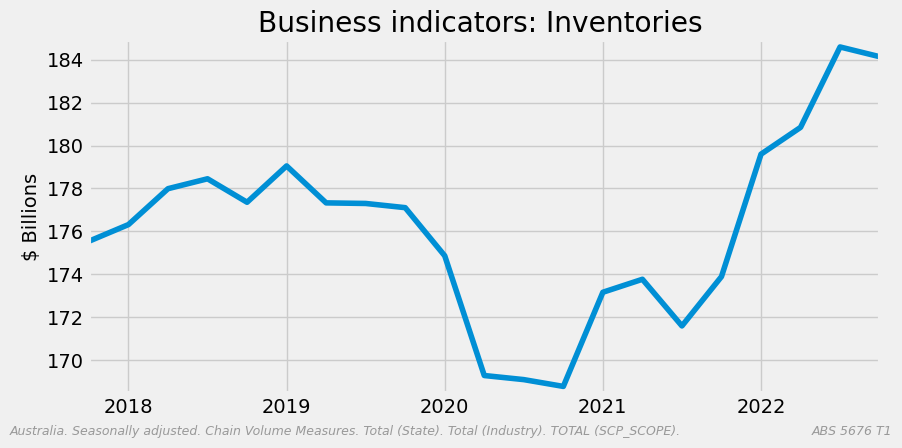

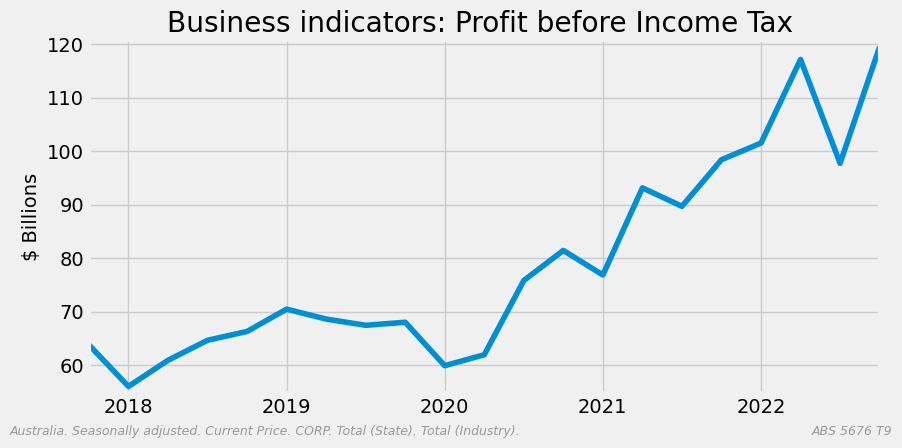

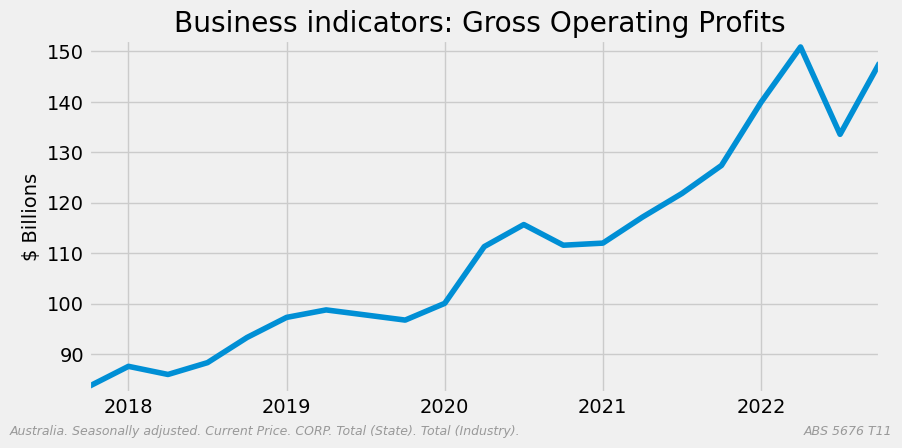

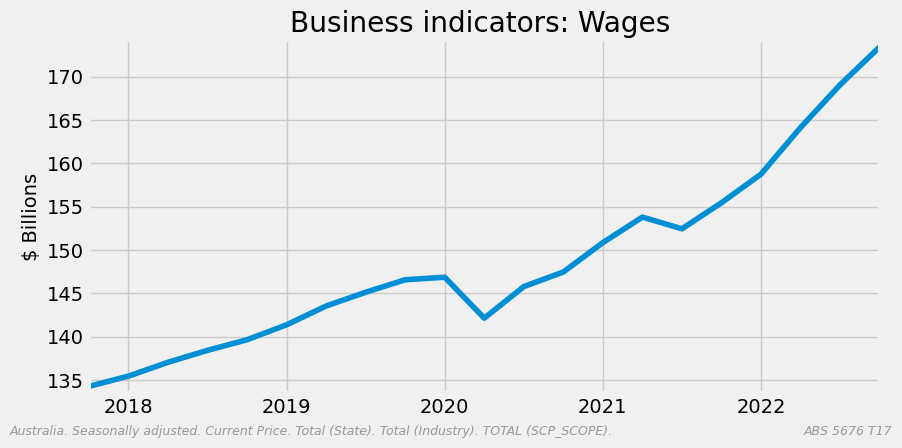

In [6]:
series_type = "Seasonally Adjusted"
headlines = [
    "Inventories ;  Total (State) ;  Total (Industry) ;  Chain Volume Measures ;",
    "Profit before Income Tax ;  Total (State) ;  Total (Industry) ;  Current Price ;  CORP ;",
    "Gross Operating Profits ;  Total (State) ;  Total (Industry) ;  Current Price ;  CORP ;",
    "Wages ;  Total (State) ;  Total (Industry) ;  Current Price ;",
]
recent = plot_times[1]
for h in headlines:
    # get the data
    row = meta[
        (meta[type_col] == series_type) & meta[did_col].str.contains(h, regex=False)
    ].iloc[0]
    series_id, units, table = row[id_col], row[unit_col], row[table_col]
    series, units = recalibrate_series(abs_dict[table][series_id], units)

    # plot
    lfooter = f"Australia. {series_type.capitalize()}. "
    title, lfooter = fix_title(f"Business indicators: {row[did_col]}", lfooter)
    ax = series[series.index > pd.Period(recent, freq="Q")].plot()
    finalise_plot(
        ax,
        title=title,
        ylabel=units,
        pre_tag="!",
        rfooter=f"{source} T{table}",
        lfooter=lfooter,
        show=True,
    )

### Inventories by industry sector

In [7]:
# identify the plotable items ...
table = "1"
data = abs_dict[table]
series_type = "Seasonally Adjusted"
measure_type = "Chain Volume Measures"
rows = meta[
    (meta[type_col] == series_type)
    & meta[did_col].str.contains("Inventories", regex=False)
    & meta[did_col].str.contains(measure_type, regex=False)
    & meta[unit_col].str.contains("$", regex=False)
]

for index, row in rows.iterrows():
    # get the data for wacg poltable item
    series_id, units = row[id_col], row[unit_col]
    if series_id not in data:
        print(f"That's odd, {series_id} not found: {row[did_col]}")
        continue
    series, units = recalibrate_series(abs_dict[table][series_id], units)

    # plot the data
    lfooter = f"Australia. {series_type.capitalize()}. "
    title, lfooter = fix_title(row[did_col], lfooter)
    ax = series[series.index >= pd.Period(recent, freq="Q")].plot()
    finalise_plot(
        ax,
        title=title,
        ylabel=units,
        tag="inventories",
        rfooter=f"{source} T{table}",
        lfooter=lfooter,
        # show=True
    )

That's odd, A3530045R not found: Inventories ;  Total (State) ;  Basic chemical and chemical product manufacturing ;  Chain Volume Measures ;  TOTAL (SCP_SCOPE) ;
That's odd, A3530033F not found: Inventories ;  Total (State) ;  Beverage and tobacco product manufacturing ;  Chain Volume Measures ;  TOTAL (SCP_SCOPE) ;
That's odd, A3530053R not found: Inventories ;  Total (State) ;  Fabricated metal product manufacturing ;  Chain Volume Measures ;  TOTAL (SCP_SCOPE) ;
That's odd, A3530031A not found: Inventories ;  Total (State) ;  Food product manufacturing ;  Chain Volume Measures ;  TOTAL (SCP_SCOPE) ;
That's odd, A3530059C not found: Inventories ;  Total (State) ;  Furniture and other manufacturing ;  Chain Volume Measures ;  TOTAL (SCP_SCOPE) ;
That's odd, A3530057X not found: Inventories ;  Total (State) ;  Machinery and equipment manufacturing ;  Chain Volume Measures ;  TOTAL (SCP_SCOPE) ;
That's odd, A3530049X not found: Inventories ;  Total (State) ;  Non-metallic mineral produ

## Finished

In [8]:
# watermark
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Mon Feb 27 2023 20:15:19

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.10.0

pandas    : 1.5.3
sys       : 3.11.0 | packaged by conda-forge | (main, Jan 15 2023, 05:44:48) [Clang 14.0.6 ]
matplotlib: 3.7.0

Watermark: 2.3.1



In [9]:
print("Finished")

Finished
